In [12]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

In [13]:
# Ecuaciones diferenciales
def eom(y,t,parametros):
    masas=parametros['masas']
    r1=y[0:3]
    r2=y[3:6]
    r3=y[6:9]
    
    v1=y[9:12]
    v2=y[12:15]
    v3=y[15:18]

    dr1dt=v1
    dr2dt=v2
    dr3dt=v3

    dv1dt=masas[0]*(masas[1]/norm(r2-r1)**3*(r2-r1)+masas[1]/norm(r3-r1)**3*(r3-r1))
    dv2dt=masas[1]*(masas[0]/norm(r1-r2)**3*(r1-r2)+masas[2]/norm(r3-r2)**3*(r3-r2))
    dv3dt=masas[2]*(masas[0]/norm(r1-r3)**3*(r1-r3)+masas[1]/norm(r2-r3)**3*(r2-r3))

    return dr1dt.tolist()+dr2dt.tolist()+dr3dt.tolist()+dv1dt.tolist()+dv2dt.tolist()+dv3dt.tolist()

In [22]:
# Propiedades y condiciones iniciales
parametros={'masas':[1.0,1.0,2.0]}

r1=[1,0,0]
v1=[0,1,0]

r2=[-1,0,0]
v2=[0,-1,0]

r3=[0.5,0,0]
v3=[0,0,1]

ys=r1+r2+r3+v1+v2+v3
ts=linspace(0,10,1000)

solucion=odeint(eom,ys,ts,args=(parametros,))

In [23]:
# Extraer trayectorias de la solución
r1s = solucion[:,0:3]
r2s = solucion[:,3:6]
r3s = solucion[:,6:9]

(-2, 2)

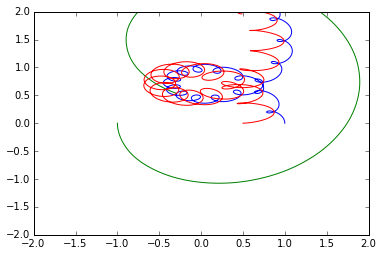

In [24]:
# Graficar en 2D
fig = plt.figure()
ax=fig.gca()

ax.plot(r1s[:,0],r1s[:,1])
ax.plot(r2s[:,0],r2s[:,1])
ax.plot(r3s[:,0],r3s[:,1])

ext=2
ax.set_xlim(-ext,ext)
ax.set_ylim(-ext,ext)

(-2, 2)

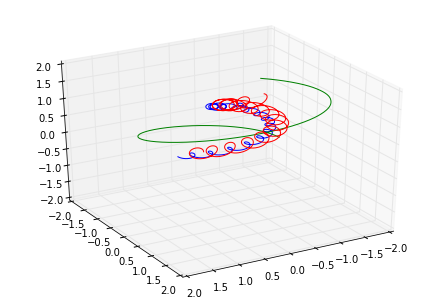

In [25]:
# Graficar en 3D
fig = plt.figure()
ax=Axes3D(fig)

ax.plot(r1s[:,0],r1s[:,1],r1s[:,2])
ax.plot(r2s[:,0],r2s[:,1],r2s[:,2])
ax.plot(r3s[:,0],r3s[:,1],r3s[:,2])

ax.view_init(elev=30,azim=60)

ext=2
ax.set_xlim(-ext,ext)
ax.set_ylim(-ext,ext)
ax.set_zlim(-ext,ext)